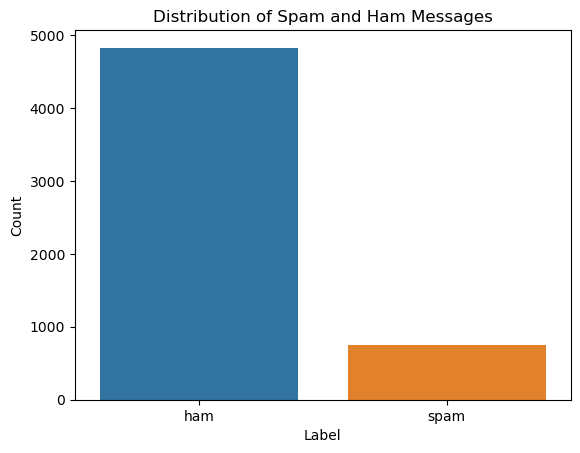

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.88      0.91      0.89       150

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[946  19]
 [ 14 136]]
Accuracy Score: 0.9704035874439462


In [10]:
# 1. IMPORTING LIBRARIES
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 2. LOADING DATA
dataset_path = r"C:\Users\glchu\Downloads\spam.csv"
data = pd.read_csv(dataset_path, sep=",", encoding="ISO-8859-1")

# 3. DATA EXPLORATION
# 3.1 FEATURE ENGINEERING
sns.countplot(x='v1', data=data)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 3.2 OUTLIER DETECTION
# No outlier detection for text classification

# 4. DATA PREPROCESSING
# 4.1 CLEANING TEXT
data['cleaned_message'] = data['v2'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).lower())

# 4.2 TOKENIZATION, 4.3 REMOVING STOPWORDS, 4.4 LEMMATIZATION
# Not explicitly done for this example, but you might want to use advanced NLP libraries like spaCy for more sophisticated tokenization, stopword removal, and lemmatization.

# 5. VECTORIZATION
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_message'])
y = data['v1'].map({'ham': 0, 'spam': 1})

# 6. MODEL BUILDING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

# 7. EVALUATING MODELS
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# 8. END
